In [ ]:
#Shide Adibi & Md Kamal Hossain

In [1]:
import re
import pandas as pd
import collections as co
import math
import numpy as np
import matplotlib.pyplot as plt
#Reads the data into a pandas DataFrame
data = pd.read_csv("bios.csv", usecols = ["Bio","Label","Year","Name"])

In [2]:
#method to extract terms from a text
#s='We are 4 Students' turnes into
#s=['we','are','students']
def ToTermsSeries(text):
    terms=re.sub(r"[^a-z ]+",'',text.lower()).split(' ')
    return [x for x in terms if len(x)>1]

In [3]:
#turn documents into series of terms
#f=['she is a teacher', 'she teaches at school'] will turn into
#f=[['she','is','a','teacher],['she','teaches','at','school']]
femaleDocuments=[]
for bio in data.query("Label=='F'")['Bio']:
    femaleDocuments.append(ToTermsSeries(bio))
maleDocuments=[]
for bio in data.query("Label=='M'")['Bio']:
    maleDocuments.append(ToTermsSeries(bio))

In [4]:
#extracting the terms used in all of the documents
#[['she','is','a','teacher],['she','teaches','at','school']] results
#['she','is','a','teacher','teaches','at','school']
terms=list(set([term for termList in maleDocuments+femaleDocuments for term in termList]))
print('Number of unique terms: '+ str(len(terms)))

Number of unique terms: 4375


In [5]:
def CalculatePMI(documents, terms):
    P_terms=dict()
    for t1 in terms:
        P_terms[t1]=dict()
        for t2 in terms:
            P_terms[t1][t2]=0
    #Since the matrix is symmetric, we only calculate the upper half
    for t1 in range(len(terms)):
        for d in documents:
            if terms[t1] in d:
                for t2 in range(t1, len(terms)):
                    if terms[t2] in d:                        
                        P_terms[terms[t1]][terms[t2]]=P_terms[terms[t1]][terms[t2]]+(1/len(documents))
                    P_terms[terms[t2]][terms[t1]]=P_terms[terms[t1]][terms[t2]]
    #PMI
    for term1 in P_terms:
        for term2 in P_terms[term1]:
            if term1 != term2:
                P_XY=P_terms[term1][term2]
                P_X=P_terms[term1][term1]
                P_Y=P_terms[term2][term2]
                P_C=P_X*P_Y
                if(P_XY>P_C):
                    P_terms[term1][term2]=math.log2(P_XY/P_C)
    return P_terms 

In [ ]:
PMI_female=CalculatePMI(femaleDocuments,terms)
PMI_male=CalculatePMI(maleDocuments,terms)

In [8]:
result=[]
for t1 in range(len(terms)):
    for t2 in range(t1, len(terms)):
        diff=PMI_female[terms[t1]][terms[t2]]-PMI_male[terms[t1]][terms[t2]]
        if(math.fabs(diff)>0):
            result.append((terms[t1],terms[t2],diff))

In [9]:
sortedResult=sorted(result, key=lambda x:x[2])
sortedResult

[('kingdom', 'ict', -7.257387842692652),
 ('kingdom', 'nrf', -7.257387842692652),
 ('kingdom', 'amongst', -7.257387842692652),
 ('kingdom', 'african', -7.257387842692652),
 ('kingdom', 'icts', -7.257387842692652),
 ('kingdom', 'disadvantaged', -7.257387842692652),
 ('kingdom', 'ejisdc', -7.257387842692652),
 ('kingdom', 'town', -7.257387842692652),
 ('kingdom', 'malawi', -7.257387842692652),
 ('kingdom', 'researched', -7.257387842692652),
 ('kingdom', 'chigona', -7.257387842692652),
 ('kingdom', 'tanzania', -7.257387842692652),
 ('kingdom', 'unesconetexplo', -7.257387842692652),
 ('reprints', 'paths', -7.257387842692652),
 ('reprints', 'enables', -7.257387842692652),
 ('reprints', 'gannon', -7.257387842692652),
 ('reprints', 'existential', -7.257387842692652),
 ('reprints', 'policys', -7.257387842692652),
 ('reprints', 'prospect', -7.257387842692652),
 ('reprints', 'ed', -7.257387842692652),
 ('reprints', 'enhancement', -7.257387842692652),
 ('reprints', 'bestseller', -7.25738784269265

In [26]:
sortedResult=sorted(result, key=lambda x:-x[2])
sortedResult

[('aaai', 'cruz', 5.247927513443586),
 ('aaai', 'icml', 5.247927513443586),
 ('aaai', 'santa', 5.247927513443586),
 ('aaas', 'ai', 5.247927513443586),
 ('aaas', 'anita', 5.247927513443586),
 ('aaas', 'chan', 5.247927513443586),
 ('aaas', 'codirector', 5.247927513443586),
 ('aaas', 'disorders', 5.247927513443586),
 ('aaas', 'individual', 5.247927513443586),
 ('aaas', 'mataric', 5.247927513443586),
 ('aaas', 'outreach', 5.247927513443586),
 ('aaas', 'pediatrics', 5.247927513443586),
 ('aaas', 'southern', 5.247927513443586),
 ('aaas', 'stroke', 5.247927513443586),
 ('aaas', 'tr', 5.247927513443586),
 ('aaas', 'viterbi', 5.247927513443586),
 ('ability', 'ai', 5.247927513443586),
 ('ability', 'alzheimers', 5.247927513443586),
 ('ability', 'among', 5.247927513443586),
 ('ability', 'anita', 5.247927513443586),
 ('ability', 'assistance', 5.247927513443586),
 ('ability', 'autism', 5.247927513443586),
 ('ability', 'borg', 5.247927513443586),
 ('ability', 'brain', 5.247927513443586),
 ('ability',

In [27]:
len(sortedResult)

524350

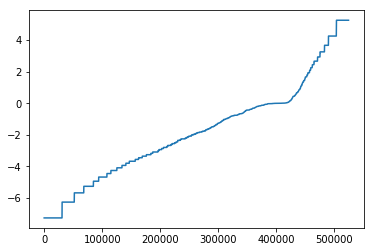

In [10]:
plt.plot([x[2] for x in sortedResult])
plt.show()